In [ ]:
library(mirt)

library(tidyr)
library(dplyr)


In [10]:
# Read the CSV file into R
df <- read.csv("../data/eye_tracking_rated.csv", stringsAsFactors = FALSE)
df_select <- df%>%
    select(RECORDING_SESSION_LABEL, trialid, response)

head(df_select)

,RECORDING_SESSION_LABEL,trialid,response
,<chr>,<int>,<int>
1,ET24_066,4,1
2,ET24_066,12,1
3,ET24_066,1,1
4,ET24_066,18,0
5,ET24_066,6,1
6,ET24_066,20,0


In [14]:
df_wide <- df_select %>%
  pivot_wider(
    names_from = trialid,
    values_from = response
  ) %>%
  arrange(RECORDING_SESSION_LABEL)

# Remove participant ID (mirt requires only numeric matrix)
response_matrix <- df_wide %>% select(-RECORDING_SESSION_LABEL)

csv.write

RECORDING_SESSION_LABEL,4,12,1,18,6,20,3,15,7,⋯,14,8,16,2,9,11,10,17,5,19
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ET220001,0,0,1,1,1,0,1,0,0,⋯,0,1,0,1,0,0,1,1,0,1
ET220002,1,1,1,1,0,0,0,1,0,⋯,0,1,1,1,0,1,0,NA,0,NA
ET220003,0,0,1,0,1,0,1,0,0,⋯,1,1,0,1,0,0,0,1,1,0
ET220004,1,0,1,1,0,0,1,0,0,⋯,0,1,0,1,0,1,0,0,1,1
ET220005,1,1,1,1,1,0,1,0,0,⋯,0,1,1,1,0,1,0,0,1,1
ET220006,1,0,1,0,0,0,1,0,0,⋯,0,1,0,1,1,0,0,0,0,0


In [24]:
write.csv(df_wide, "../output/theta_wide.csv", row.names = FALSE)

In [15]:
# Fit a 2PL model
model_2pl <- mirt(response_matrix, 1, itemtype = "2PL")

# Summary
summary(model_2pl)

# Item parameters (discrimination = a, difficulty = b)
coef(model_2pl, IRTpars = TRUE, simplify = TRUE)

# Person abilities (theta)
fscores(model_2pl)


Iteration: 70, Log-Lik: -722.143, Max-Change: 0.00010
        F1       h2
4   0.5620 0.315816
12  0.1727 0.029822
1   0.9832 0.966650
18  0.0127 0.000161
6   0.5605 0.314135
20  0.0448 0.002009
3   0.5722 0.327377
15  0.1938 0.037554
7  -0.5290 0.279856
13  0.3893 0.151542
14 -0.3575 0.127810
8   0.6182 0.382140
16  0.0544 0.002963
2   0.2221 0.049330
9   0.1997 0.039895
11  0.3512 0.123313
10  0.1541 0.023742
17 -0.3055 0.093349
5   0.7772 0.604011
19  0.6108 0.373021

SS loadings:  4.244 
Proportion Var:  0.212 

Factor correlations: 

   F1
F1  1


,a,b,g,u
4,1.15635102,-1.13362314,0,1
12,0.29840153,-0.34421939,0,1
1,9.16319706,-2.04994772,0,1
18,0.02162192,12.97264744,0,1
6,1.15185643,-1.03814474,0,1
20,0.07636548,47.68473208,0,1
3,1.18740200,-2.37819320,0,1
15,0.33620210,4.62652903,0,1
7,-1.06100445,-3.47917824,0,1
13,0.71930165,2.65342836,0,1


F1
-0.46808757
-0.58092908
-0.50878238
0.41225245
0.97265371
-0.65817526
-0.50906611
-0.17042079
0.46882186
-0.55967095


In [17]:
# Save person ability estimates
abilities <- fscores(model_2pl)
write.csv(abilities, "../output/person_abilities.csv", row.names = FALSE)

# Save item parameters
item_params <- coef(model_2pl, IRTpars = TRUE, simplify = TRUE)$items
write.csv(item_params, "../output/item_parameters.csv", row.names = TRUE)


Iteration: 93, Log-Lik: -539.725, Max-Change: 0.00010


,a,b,g,u
4,1.0050077,-1.24218077,0,1
12,0.2378435,-0.42768146,0,1
1,2.1526133,-2.85168822,0,1
6,1.1915272,-1.01391563,0,1
3,1.3505153,-2.18461780,0,1
15,0.3122526,4.96773695,0,1
13,0.7769725,2.49093729,0,1
8,1.3536176,-0.71626604,0,1
9,0.3623783,-1.36435581,0,1
11,0.5649260,0.66778274,0,1


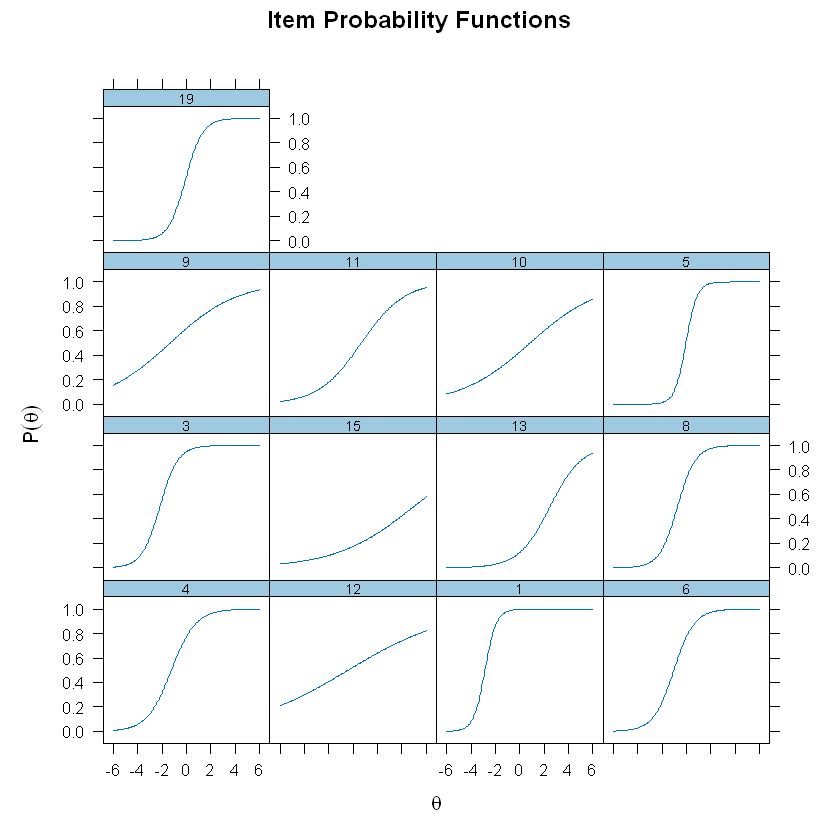

In [20]:

# Drop problematic items: 2, 7, 14, 16, 17, 18, 20
items_to_drop <- c("2", "7", "14", "16", "17", "18", "20")
df_clean <- response_matrix[, !(names(response_matrix) %in% items_to_drop)]

# Fit 2PL model using mirt
mod_2pl_clean <- mirt(df_clean, 1, itemtype = "2PL")

# Summarize item parameters
coef(mod_2pl_clean, IRTpars = TRUE, simplify = TRUE)

# Optional: Plot Item Characteristic Curves (ICCs)
plot(mod_2pl_clean, type = "trace")


In [22]:
# Save person ability estimates
abilities <- fscores(mod_2pl_clean)
write.csv(abilities, "../output/person_abilities_clean.csv", row.names = FALSE)

# Save item parameters
item_params <- coef(mod_2pl_clean, IRTpars = TRUE, simplify = TRUE)$items
write.csv(item_params, "../output/item_parameters_clean.csv", row.names = TRUE)